# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gangtok
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | brokopondo
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | tual
Processing Record 11 of Set 1 | ghadamis
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | nueva gerona
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | midvagur
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | darwin
Processing Record 21 of Set 1 | ornskoldsvik
Processing Record 22

City not found. Skipping...
Processing Record 39 of Set 4 | tyuratam
Processing Record 40 of Set 4 | puerto lempira
Processing Record 41 of Set 4 | laayoune plage
City not found. Skipping...
Processing Record 42 of Set 4 | port macquarie
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | caxito
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | tazovsky
Processing Record 47 of Set 4 | nar'yan-mar
Processing Record 48 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 49 of Set 4 | roma
Processing Record 0 of Set 5 | danville
Processing Record 1 of Set 5 | emerald
Processing Record 2 of Set 5 | margaret river
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | qina
Processing Record 5 of Set 5 | rio grande
Processing Record 6 of Set 5 | indre arna
Processing Record 7 of Set 5 | ratnagiri
Processing Record 8 of Set 5 | siniscola
Processing Record 9 of Set 5 | ishigaki
Processing Record 10 of Set 5 | santo a

Processing Record 32 of Set 8 | alice springs
Processing Record 33 of Set 8 | kapa'a
Processing Record 34 of Set 8 | chardara
Processing Record 35 of Set 8 | zaragoza
Processing Record 36 of Set 8 | greenville
Processing Record 37 of Set 8 | zarzis
Processing Record 38 of Set 8 | pazaryolu
Processing Record 39 of Set 8 | yarmouth
Processing Record 40 of Set 8 | mirny
Processing Record 41 of Set 8 | isheyevka
Processing Record 42 of Set 8 | rikaze
Processing Record 43 of Set 8 | crotone
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | wasco
Processing Record 47 of Set 8 | coronel dorrego
Processing Record 48 of Set 8 | williston
Processing Record 49 of Set 8 | alaghsas
Processing Record 0 of Set 9 | lamu
Processing Record 1 of Set 9 | ayr
Processing Record 2 of Set 9 | xining
Processing Record 3 of Set 9 | vorkuta
Processing Record 4 of Set 9 | zhengjiatun
Processing Record 5 of Set 9 | beichengqu
Processing Record 6

Processing Record 24 of Set 12 | fuxin
Processing Record 25 of Set 12 | berezovo
Processing Record 26 of Set 12 | laojunmiao
Processing Record 27 of Set 12 | gossau
Processing Record 28 of Set 12 | huarmey
Processing Record 29 of Set 12 | conde
Processing Record 30 of Set 12 | goz beida
Processing Record 31 of Set 12 | okondja
Processing Record 32 of Set 12 | kasane
Processing Record 33 of Set 12 | lalganj
Processing Record 34 of Set 12 | acapulco de juarez
Processing Record 35 of Set 12 | galveston
Processing Record 36 of Set 12 | lasem
Processing Record 37 of Set 12 | toyooka
Processing Record 38 of Set 12 | vite
Processing Record 39 of Set 12 | cill airne
Processing Record 40 of Set 12 | anda
Processing Record 41 of Set 12 | cable beach
City not found. Skipping...
Processing Record 42 of Set 12 | nalut
Processing Record 43 of Set 12 | rauma
Processing Record 44 of Set 12 | saurimo
Processing Record 45 of Set 12 | ahau
City not found. Skipping...
Processing Record 46 of Set 12 | moss

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gangtok,27.3333,88.6167,19.81,98,100,1.01,IN,1691550650
1,longyearbyen,78.2186,15.6401,6.91,87,0,1.54,SJ,1691550650
2,brokopondo,4.7500,-55.1667,25.93,84,91,3.46,SR,1691550642
3,adamstown,-25.0660,-130.1015,22.23,85,95,15.43,PN,1691550650
4,punta arenas,-53.1500,-70.9167,1.27,94,45,4.01,CL,1691550025


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID") #had to add the .. to go back a directory

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_data_df['Date_1'] = city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s'))
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_1
City_ID,,,,,,,,,,
0,gangtok,27.3333,88.6167,19.81,98,100,1.01,IN,2023-08-09 03:10:50,2023-08-09 03:10:50
1,longyearbyen,78.2186,15.6401,6.91,87,0,1.54,SJ,2023-08-09 03:10:50,2023-08-09 03:10:50
2,brokopondo,4.7500,-55.1667,25.93,84,91,3.46,SR,2023-08-09 03:10:42,2023-08-09 03:10:42
3,adamstown,-25.0660,-130.1015,22.23,85,95,15.43,PN,2023-08-09 03:10:50,2023-08-09 03:10:50
4,punta arenas,-53.1500,-70.9167,1.27,94,45,4.01,CL,2023-08-09 03:00:25,2023-08-09 03:00:25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

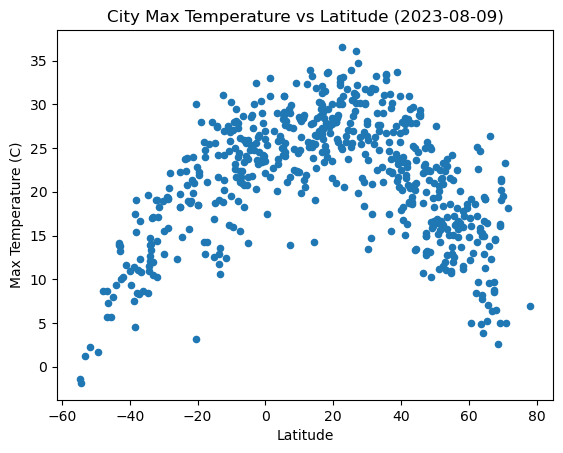

In [15]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y = "Max Temp", kind = "scatter")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temperature vs Latitude (" + str(city_data_df['Date_1'][0])[:10] + ")")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

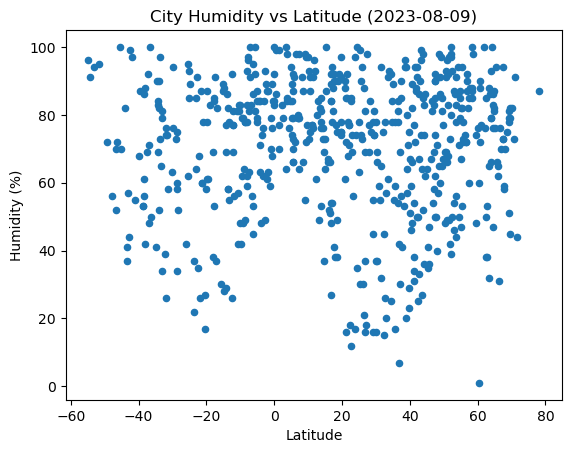

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y = "Humidity", kind = "scatter")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs Latitude (" + str(city_data_df['Date_1'][0])[:10] + ")")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

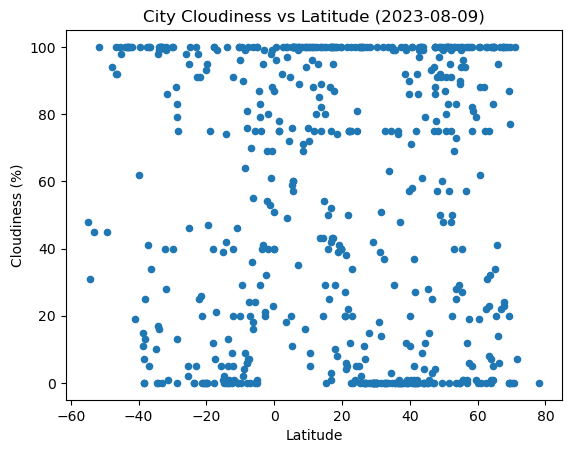

In [17]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y = "Cloudiness", kind = "scatter")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness vs Latitude (" + str(city_data_df['Date_1'][0])[:10] + ")")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

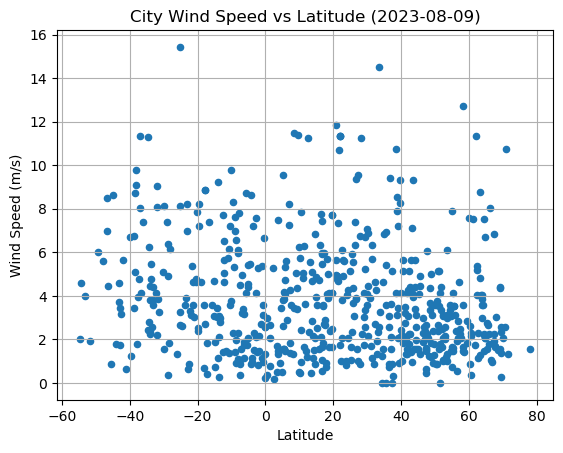

In [18]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y = "Wind Speed", kind = "scatter")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Wind Speed vs Latitude (" + str(city_data_df['Date_1'][0])[:10] + ")")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def regression(x,y,xlabel,ylabel): #need x,y, as well as labels for axes.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) #relevant regression values
    regline = x*slope + intercept #regression line
    line_eq = "The regression line is y = " + str(round(slope,2))+"*x + " + str(round(intercept,2)) #string of line equation
    plt.plot(x,regline,"r-") #plot fit line
    plt.scatter(x,y) #scatter plot
    plt.annotate(line_eq,(min(x),min(y)), fontsize=15,color="red") #write fit line and place it at bottom of plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ylabel + " vs. " + xlabel) #title for graph
    plt.show()
    print(line_eq)
    print("The r value is " + str(round(rvalue,2)))

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_1
City_ID,,,,,,,,,,
0,gangtok,27.3333,88.6167,19.81,98,100,1.01,IN,2023-08-09 03:10:50,2023-08-09 03:10:50
1,longyearbyen,78.2186,15.6401,6.91,87,0,1.54,SJ,2023-08-09 03:10:50,2023-08-09 03:10:50
2,brokopondo,4.7500,-55.1667,25.93,84,91,3.46,SR,2023-08-09 03:10:42,2023-08-09 03:10:42
6,talnakh,69.4865,88.3972,21.23,45,77,0.26,RU,2023-08-09 03:10:50,2023-08-09 03:10:50
7,whitehorse,60.7161,-135.0538,16.12,90,100,2.14,CA,2023-08-09 03:10:35,2023-08-09 03:10:35


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_1
City_ID,,,,,,,,,,
3,adamstown,-25.0660,-130.1015,22.23,85,95,15.43,PN,2023-08-09 03:10:50,2023-08-09 03:10:50
4,punta arenas,-53.1500,-70.9167,1.27,94,45,4.01,CL,2023-08-09 03:00:25,2023-08-09 03:00:25
5,waitangi,-43.9535,-176.5597,9.34,82,100,1.79,NZ,2023-08-09 03:10:50,2023-08-09 03:10:50
9,tual,-5.6667,132.7500,25.57,81,24,8.74,ID,2023-08-09 03:06:40,2023-08-09 03:06:40
18,darwin,-12.4611,130.8418,31.05,26,0,7.72,AU,2023-08-09 03:07:43,2023-08-09 03:07:43


###  Temperature vs. Latitude Linear Regression Plot

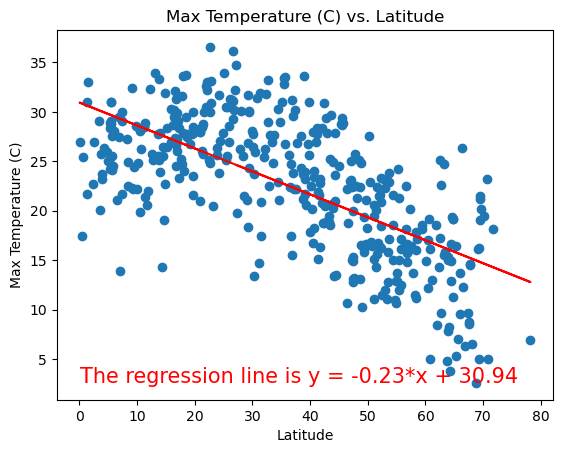

The regression line is y = -0.23*x + 30.94
The r value is -0.66


In [35]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], "Latitude", "Max Temperature (C)")

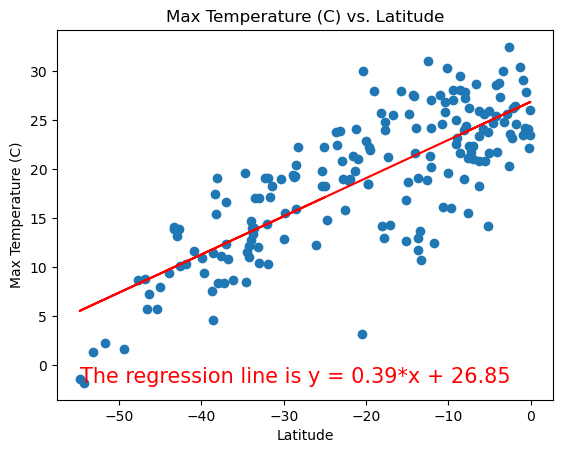

The regression line is y = 0.39*x + 26.85
The r value is 0.79


In [36]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], "Latitude", "Max Temperature (C)")

**Discussion about the linear relationship:** In both cases the r value is fairly big and there is a decently strong linear correlation between Latitude and max temperature. In the nothern Hemisphere the relationship is negative and in the southern hemisphere it is positive. This makes sense, as I would expect places further from the equator to be colder, and in the northern hemisphere, a higher latitude means going further away from the equator while in the southern hemisphere it is the opposite. 

### Humidity vs. Latitude Linear Regression Plot

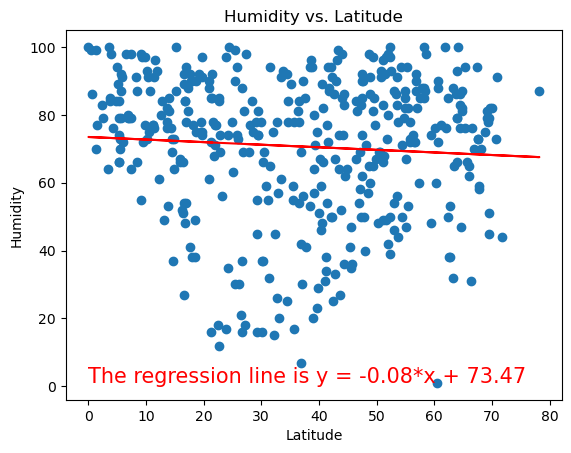

The regression line is y = -0.08*x + 73.47
The r value is -0.07


In [38]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], "Latitude", "Humidity")

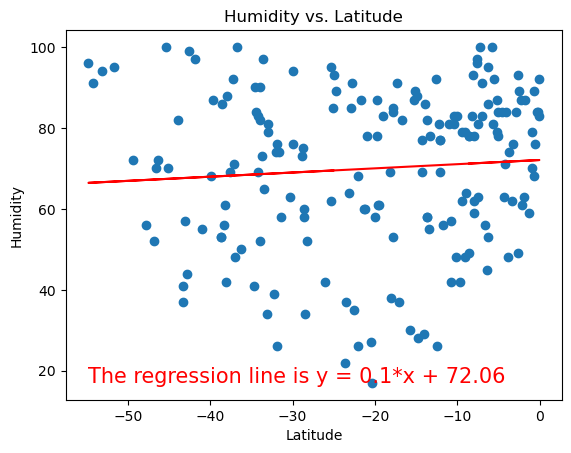

The regression line is y = 0.1*x + 72.06
The r value is 0.08


In [39]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], "Latitude", "Humidity")

**Discussion about the linear relationship:** The r value for both graphs is incredibly low. There is no clear clear linear correlation between Humidity and Latitude

### Cloudiness vs. Latitude Linear Regression Plot

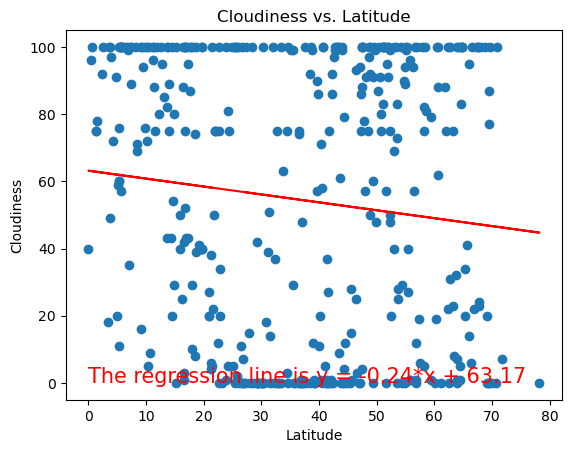

The regression line is y = -0.24*x + 63.17
The r value is -0.11


In [40]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

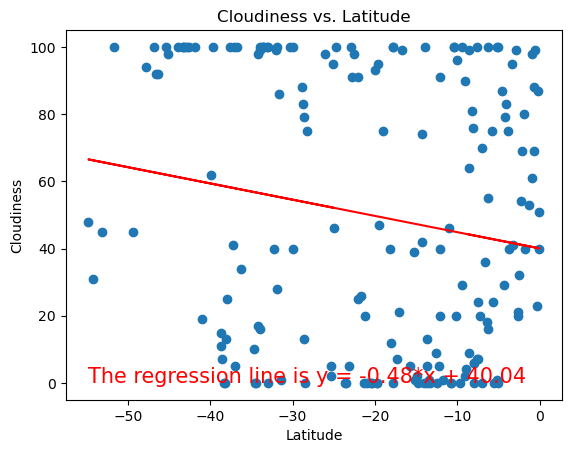

The regression line is y = -0.48*x + 40.04
The r value is -0.17


In [41]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Like with Humidity, there is not a clear correlation, and the r values are both very low. As such we can say there is no linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

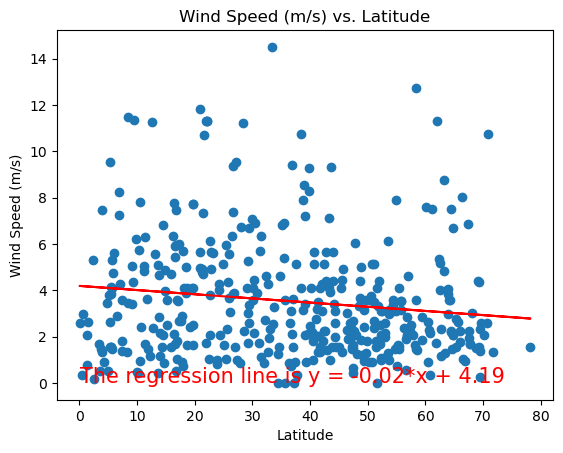

The regression line is y = -0.02*x + 4.19
The r value is -0.14


In [42]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)")

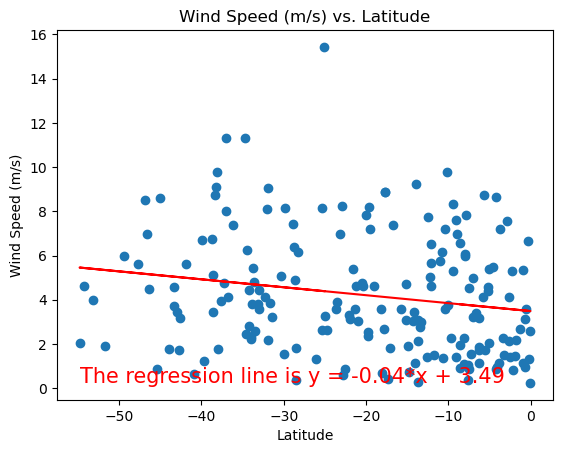

The regression line is y = -0.04*x + 3.49
The r value is -0.19


In [43]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** There is no clear relation. In both the north and south the r value is very low and shows very little correlation.